In [15]:
from autorank import autorank, create_report,plot_stats,latex_table

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
df_raw = pd.read_csv("saved_cd_results_csv/example_all_new.csv")

In [18]:
df_raw

,run,model,dataset,prequential_scores,time,memory
0,1,ARFC,adult,0.817145,79.857509,18.027344
1,2,ARFC,adult,0.816408,88.500604,20.464844
2,3,ARFC,adult,0.813153,79.812694,17.750000
3,4,ARFC,adult,0.811822,81.136639,15.285156
4,5,ARFC,adult,0.809037,89.699469,23.972656
...,...,...,...,...,...,...
555,1,SRPC,vehicle_sensIT,0.784782,2296.645563,207.492188
556,2,SRPC,vehicle_sensIT,0.779240,1983.974548,159.156250
557,3,SRPC,vehicle_sensIT,0.780296,2148.411239,143.398438
558,4,SRPC,vehicle_sensIT,0.775678,2055.873046,133.304688


In [19]:
# only for normal result with single-run
#df = df_raw.pivot(index='dataset',columns='model',values='score')

In [20]:
# only for normal result with multi-run
df = df_raw.pivot_table(index='dataset',columns='model',values='prequential_scores',aggfunc='mean')

In [21]:
df.index.name = None
df.columns.name=None

In [22]:
#df = df[['AutoStreamML','AutoClass','EvoAutoML','OnlineAutoML']]
df = df[['AutoStreamML','AutoStreamML_Best','AutoClass','OnlineAutoML','EvoAutoML','ARFC','SRPC','HATC']]

In [23]:
#df.columns = ['ASML_E','AutoClass','EAML','OAML']
df.columns = ['ASML_E','ASML_B','AutoClass','OAML','EAML','ARFC','SRPC','HATC']

In [24]:
df

,ASML_E,ASML_B,AutoClass,OAML,EAML,ARFC,SRPC,HATC
adult,0.800094,0.803554,0.768625,0.720730,0.805569,0.813513,0.801114,0.816359
electricity,0.915007,0.906453,0.879776,0.869574,0.891331,0.858408,0.866349,0.831890
forest_cover,0.956324,0.953883,0.953154,0.831570,0.940655,0.888535,0.929660,0.709898
hyperplane_high_gradual_drift,0.918527,0.915580,0.757837,0.912749,0.876868,0.757298,0.719538,0.848751
insects,0.709522,0.712458,0.642389,0.636862,0.700549,0.686138,0.685956,0.602467
movingRBF,0.880007,0.868222,0.851102,0.672316,0.832000,0.512673,0.496177,0.393578
moving_squares,0.982131,0.986109,0.886865,0.883410,0.871183,0.595883,0.754445,0.807522
new_airlines,0.665761,0.654609,0.630264,0.670287,0.676351,0.653057,0.645331,0.652721
sea_high_abrupt_drift,0.885216,0.880357,0.843254,0.887829,0.886046,0.889154,0.843861,0.888023
sea_high_mixed_drift,0.878716,0.874732,0.841310,0.882697,0.874863,0.880255,0.817319,0.881333


In [25]:
#res = autorank(df,alpha=0.05,order='ascending',verbose=True,effect_size="cohen_d",force_mode='nonparametric')
res = autorank(df,alpha=0.05,order='descending',verbose=True,effect_size="cohen_d",force_mode='nonparametric')

Tests for normality and homoscedacity are ignored for test selection, forcing nonparametric tests
Fail to reject null hypothesis that data is normal for column ASML_E (p=0.111795>=0.006250)
Fail to reject null hypothesis that data is normal for column ASML_B (p=0.118472>=0.006250)
Fail to reject null hypothesis that data is normal for column AutoClass (p=0.442074>=0.006250)
Fail to reject null hypothesis that data is normal for column OAML (p=0.146222>=0.006250)
Fail to reject null hypothesis that data is normal for column EAML (p=0.433343>=0.006250)
Fail to reject null hypothesis that data is normal for column ARFC (p=0.751074>=0.006250)
Fail to reject null hypothesis that data is normal for column SRPC (p=0.926642>=0.006250)
Fail to reject null hypothesis that data is normal for column HATC (p=0.552471>=0.006250)
Using Bartlett's test for homoscedacity of normally distributed data
Fail to reject null hypothesis that all variances are equal (p=0.822956>=0.050000)
Using Friedman test a

In [26]:
res.rankdf

,meanrank,median,mad,ci_lower,ci_upper,effect_size,magnitude
SRPC,6.000000,0.791036,0.090196,0.648964,0.905257,0.0,negligible
HATC,5.714286,0.811940,0.089063,0.618555,0.906883,0.091835,negligible
AutoClass,5.071429,0.842282,0.094704,0.701678,0.926153,-0.265927,small
ARFC,4.785714,0.785405,0.103439,0.649958,0.905851,-0.005396,negligible
OAML,4.500000,0.850572,0.121002,0.7011,0.917167,-0.235162,small
ASML_B,3.642857,0.877545,0.075164,0.749527,0.950418,-0.55079,medium
EAML,3.642857,0.873023,0.067543,0.738666,0.938046,-0.464304,small
ASML_E,2.642857,0.882611,0.084344,0.761185,0.959912,-0.633326,medium


In [27]:
res.cd

2.806031589472583

In [28]:
create_report(res)

The statistical analysis was conducted for 8 populations with 14 paired samples.
The family-wise significance level of the tests is alpha=0.050.
We failed to reject the null hypothesis that the population is normal for all populations (minimal observed p-value=0.112). Therefore, we assume that all populations are normal.
We applied Bartlett's test for homogeneity and failed to reject the null hypothesis (p=0.823) that the data is homoscedastic. Thus, we assume that our data is homoscedastic.
Because we have more than two populations and all populations are normal and homoscedastic, we should use repeated measures ANOVA as omnibus test to determine if there are any significant differences between the mean values of the populations. However, the user decided to force the use of the less powerful Friedman test as omnibus test to determine if there are any significant differences between the mean values of the populations. We report the mean value (M), the standard deviation (SD) and the m

In [30]:
file_name = 'asml_cd_all_accuracy'

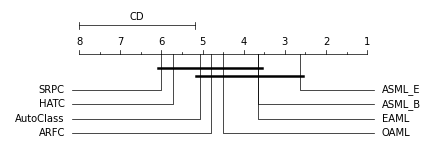

In [31]:
plot_stats(res,allow_insignificant=True)
#plt.savefig(f'charts/{file_name}.png',dpi=300,bbox_inches='tight')
plt.show()

In [32]:
latex_table(res)

\begin{table}[h]
\centering
\begin{tabular}{lrrllll}
\toprule
{} &    MR &   MED &   MAD &              CI &    \$d\$ &   Magnitude \\
\midrule
SRPC      & 6.000 & 0.791 & 0.090 &  [0.649, 0.905] &  0.000 &  negligible \\
HATC      & 5.714 & 0.812 & 0.089 &  [0.619, 0.907] &  0.092 &  negligible \\
AutoClass & 5.071 & 0.842 & 0.095 &  [0.702, 0.926] & -0.266 &       small \\
ARFC      & 4.786 & 0.785 & 0.103 &  [0.650, 0.906] & -0.005 &  negligible \\
OAML      & 4.500 & 0.851 & 0.121 &  [0.701, 0.917] & -0.235 &       small \\
ASML\_B    & 3.643 & 0.878 & 0.075 &  [0.750, 0.950] & -0.551 &      medium \\
EAML      & 3.643 & 0.873 & 0.068 &  [0.739, 0.938] & -0.464 &       small \\
ASML\_E    & 2.643 & 0.883 & 0.084 &  [0.761, 0.960] & -0.633 &      medium \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{table}
